In [22]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download("stopwords")
from nlp_utils import normalize_corpus, remove_stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gc

## Cleaning

In [9]:
df = pd.read_csv("data/ADHD.csv")
df.drop(["id","created_utc"], axis = 1, inplace=True)
df.head()

,title,selftext,score,url,num_comments,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,2011-09-03 11:58:04
2,"New study shows that for people with ADHD, \n""...",NaN,22,http://www.utexas.edu/features/2011/08/29/adhd...,11.0,2011-09-04 22:12:54
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,2011-09-06 13:53:11


In [10]:
df.shape

(336066, 6)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(330905, 6)

In [13]:
df["score"] = df["score"].astype("int32")
df["num_comments"] = df["num_comments"].astype("int32")

In [14]:
df.describe(include='all')

,title,selftext,score,url,num_comments,created_datetime
count,330905,330905,330905.000000,330905,330905.000000,330905
unique,319438,178446,NaN,330859,NaN,330426
top,Win Wednesday,[deleted],NaN,https://www.reddit.com/r/Showerthoughts/commen...,NaN,2019-04-18 17:35:34
freq,189,79456,NaN,4,NaN,4
mean,NaN,NaN,21.845282,NaN,7.360965,NaN
std,NaN,NaN,168.248935,NaN,20.888266,NaN
min,NaN,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,1.000000,NaN
50%,NaN,NaN,2.000000,NaN,3.000000,NaN
75%,NaN,NaN,7.000000,NaN,7.000000,NaN


In [15]:
df = df[["title", "score", "num_comments", "created_datetime"]]
df.head()

,title,score,num_comments,created_datetime
0,Android app to strengthen attention/focus,6,7,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,4,1,2011-09-03 11:58:04
3,What does the ADHD test look like?,6,10,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,0,0,2011-09-06 13:53:11
5,Just started Concerta today any advice/experie...,7,10,2011-09-07 17:46:52


## Data Analysis

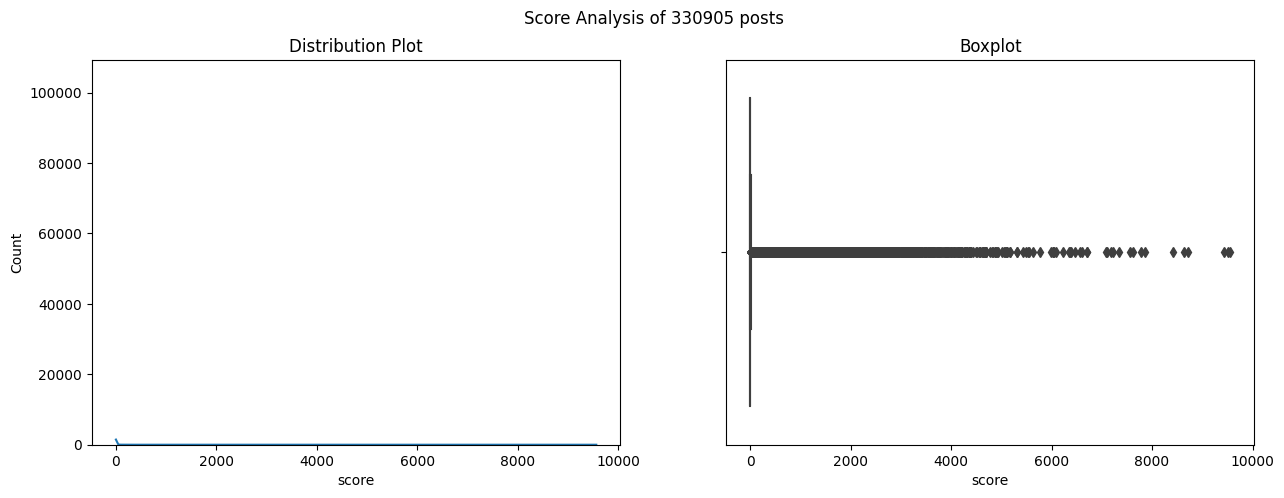

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Score Analysis of 330905 posts')

sns.histplot(ax=axes[0], x="score", data=df, kde=True)
axes[0].set_title("Distribution Plot")

sns.boxplot(ax=axes[1], x="score", data=df)
axes[1].set_title("Boxplot")

plt.show()

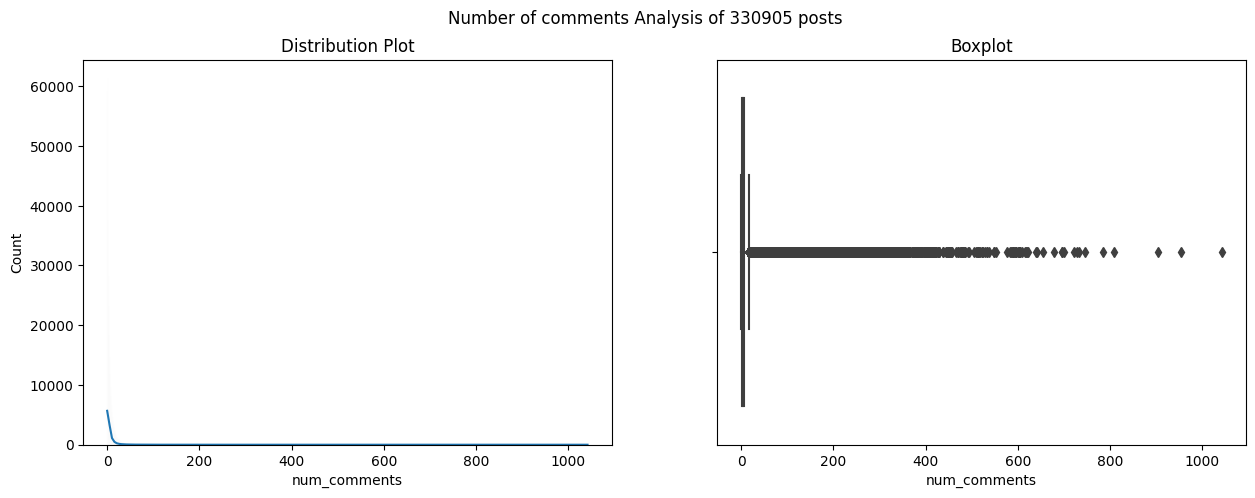

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Number of comments Analysis of 330905 posts')

sns.histplot(ax=axes[0], x="num_comments", data=df, kde=True)
axes[0].set_title("Distribution Plot")

sns.boxplot(ax=axes[1], x="num_comments", data=df)
axes[1].set_title("Boxplot")

plt.show()

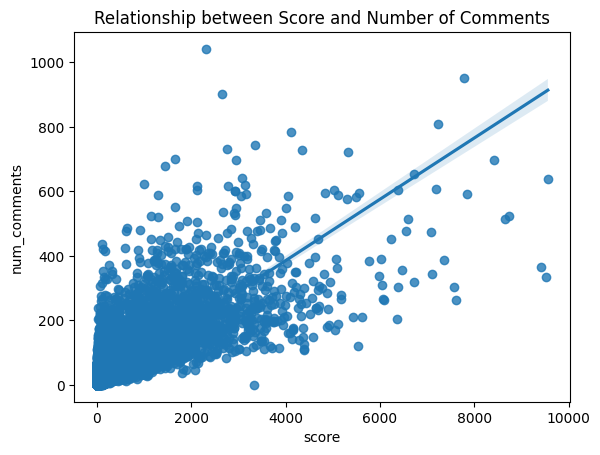

In [18]:
sns.regplot(x="score",
            y="num_comments",
            data=df)
plt.title("Relationship between Score and Number of Comments")
plt.show()

## Title Analysis

In [19]:
df["title"] = normalize_corpus(df["title"])

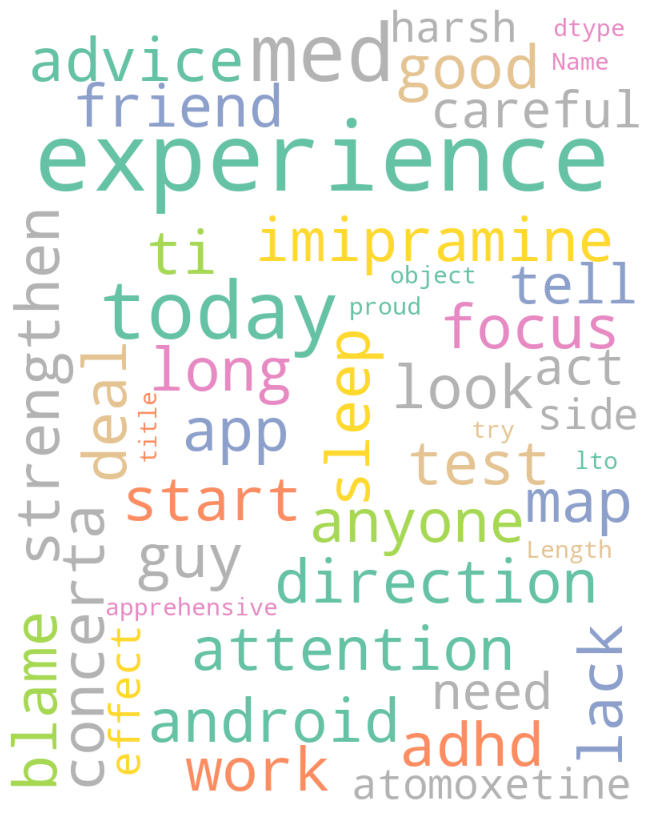

In [20]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 1000,
                max_words=1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2").generate(str(df["title"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [24]:
vectorizer = CountVectorizer(max_features=1000)
bow_title = vectorizer.fit_transform(df["title"]).toarray()
df_title = pd.DataFrame(bow_title, columns=vectorizer.get_feature_names_out())
df_title = pd.DataFrame(df_title.sum(), columns=["Value"])

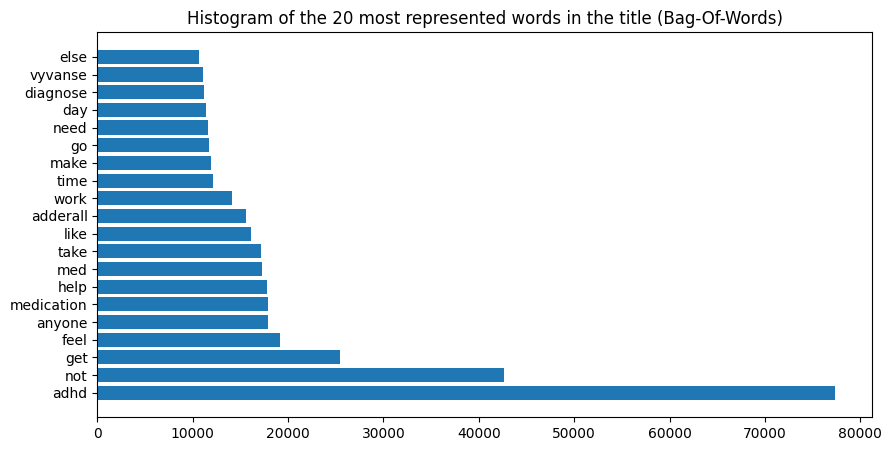

In [25]:
top_20_title_word = df_title.sort_values("Value", ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_title_word.index, width=top_20_title_word.Value)
plt.title("Histogram of the 20 most represented words in the title (Bag-Of-Words)")
plt.show()

In [26]:
vectorizer_tf = TfidfVectorizer(max_features=1000)
tfidf_title = vectorizer_tf.fit_transform(df['title']).toarray()
feature_names = vectorizer_tf.get_feature_names_out()
df_title_tf = pd.DataFrame(tfidf_title, columns=feature_names)
df_title_tf = pd.DataFrame(df_title_tf.sum(), columns=["Value"])

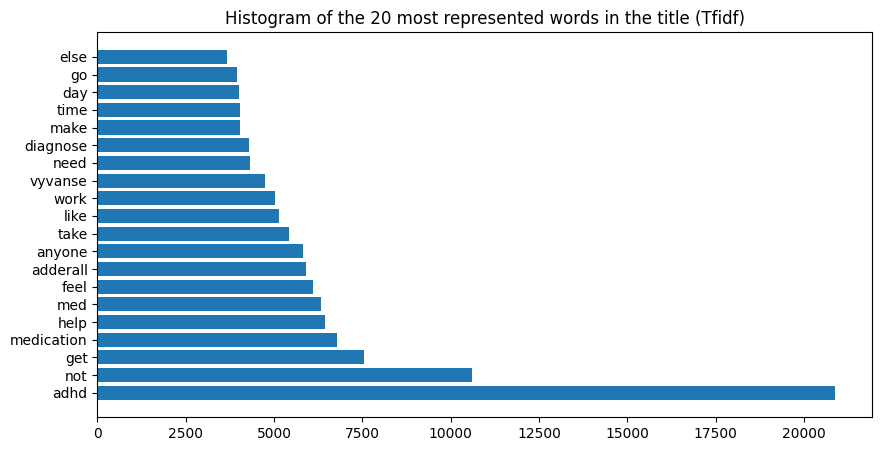

In [27]:
top_20_title_word_tf = df_title_tf.sort_values("Value",ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_title_word_tf.index, width=top_20_title_word_tf.Value)
plt.title("Histogram of the 20 most represented words in the title (Tfidf)")
plt.show()